<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:35%"><img src='https://www.np.edu.sg/images/default-source/edm/schools-logos/ict-logo-full-colour.jpg' style="width: 500px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning</h1><h2>Practical 6b - Model Training and Evaluation</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

### Objectives
After completing this practical exercise, students should be able to:
1. [Train and Evaluate a Classification Model](#class)
2. [Train and Evaluate a Regression Model](#reg)
3. [Exercise](#exc)

### 1. Train and Evaluation a Classification Model <a id='class' />

In this section, we will be using the same dataset (`titanic_new.csv`, the cleansed titanic dataset) you have been used in the past weeks. 

In [1]:
# Imports needed for this Practical
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

#### 1.1 Simple train & test split
We start by using the simple train-test split which we have been using in the past several weeks.

In [2]:
# Load Data and Split into train & test data
data = pd.read_csv('titanic_new.csv')
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state = 4)

In [3]:
x_train

,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
42,3,1,0.3500,0,0,0,0,1,1,1,1
684,2,1,0.7500,1,1,3,0,0,1,3,0
605,3,1,0.4500,1,0,2,0,0,1,2,0
409,3,0,0.3500,3,1,2,0,0,4,5,0
740,1,1,0.3500,0,0,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
360,3,1,0.5000,1,4,2,0,0,1,6,0
709,3,1,0.3500,1,1,2,0,1,2,3,0
439,2,1,0.3875,0,0,1,0,0,1,1,1
174,1,1,0.7000,0,0,2,1,1,1,1,1


In [4]:
# Build Random Forest Model and Evaluate both training and testing accuracy
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train,y_train)

print('training accuracy is: ', rf.score(x_train,y_train))
print('testing accuracy is: ', rf.score(x_test,y_test))

training accuracy is:  0.9592696629213483
testing accuracy is:  0.8379888268156425


* The high training accuracy suggests the model has low bias. 
* A big gap between training accuracy and testing accuracy suggest the model has high variance. 

Thus, the model is overfitted to the training data.

#### 1.2 K-folds Cross Validation

Now let's do something different. Instead of spliting into train and test data, we randomly split the full dataset into 5 folds (K=5) and then train & evaluate the Decision Tree model 5 times, picking a different fold for evaluation every time and training on the other 4 folds. The result is an array containing the 5 evaluation scores for both training and testing scores: 

In [5]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.96348315 0.96633941 0.96493689 0.96213184 0.95511921]
test_score:  [0.7877095  0.7752809  0.82022472 0.76404494 0.81460674]


The cross validation traning and testing accuracy will be an average of the 5 evaluation scores respectively, shown per below.

In [6]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.9624020990592055
cross val testing accuracy is: 0.7923733601154981


As an average of 5 experiments, the cross validation measures (train and test accuracy) are more representative than the simple split measures (train and test accuracy), which is only coming from one simple split. 


#### 1.3 Grid Search
To improve our model, we use the grid search to try to find the best parametars, details are shown below. 

In [7]:
# Grid Search

rf = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8], 
              "min_samples_leaf" : [1, 5, 10], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(df_x, df_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.8305316678174629
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'n_estimators': 10}


Now let's build the final model using the above recommended parametars and do a final evaluation for the model. 

In [8]:
rf_final = RandomForestClassifier(criterion='gini', 
                             n_estimators=10,
                             max_depth=6,
                             min_samples_leaf=10,
                             max_features='auto',                             
                             random_state=1,
                             n_jobs=-1)

rf_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_final.score(x_train,y_train))
print('testing acc: ', rf_final.score(x_test,y_test))
results  = cross_validate(rf_final, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8300561797752809
testing acc:  0.8435754189944135
cross val training accuracy is: 0.8409107742250658
cross val testing accuracy is: 0.8305316678174629


#### 1.4 Feature Importances


If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature's importance by computing the average depth at which it appears accross all trees in the forest. 

Scikit-Learning computes this automatically using `feature_importances_`, details are shown below.

In [9]:
x_train

,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
42,3,1,0.3500,0,0,0,0,1,1,1,1
684,2,1,0.7500,1,1,3,0,0,1,3,0
605,3,1,0.4500,1,0,2,0,0,1,2,0
409,3,0,0.3500,3,1,2,0,0,4,5,0
740,1,1,0.3500,0,0,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
360,3,1,0.5000,1,4,2,0,0,1,6,0
709,3,1,0.3500,1,1,2,0,1,2,3,0
439,2,1,0.3875,0,0,1,0,0,1,1,1
174,1,1,0.7000,0,0,2,1,1,1,1,1


In [10]:
x_train.columns

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Title', 'FamilySize', 'IsAlone'],
      dtype='object')

In [11]:
rf_final.feature_importances_

array([0.15007096, 0.37043224, 0.07034837, 0.04327562, 0.01234083,
       0.04656932, 0.05002898, 0.01905151, 0.19801596, 0.03441965,
       0.00544655])

In [12]:
pd.concat((pd.DataFrame(x_train.columns, columns = ['feature']), 
           pd.DataFrame(rf_final.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
1,Gender,0.370432
8,Title,0.198016
0,Pclass,0.150071
2,Age,0.070348
6,Cabin,0.050029
5,Fare,0.046569
3,SibSp,0.043276
9,FamilySize,0.034420
7,Embarked,0.019052
4,Parch,0.012341


### 2. Train and Evaluate a Regression Model <a id='reg' />

For the regression model, we will be using the noisy quadratic dataset we used before. We will start by using the simple train & test split, and then followed by K-folds cross validation

#### 2.1 Simple train & test split

In [13]:
# Generate the data: Quadratic data set + noise
np.random.seed(2)
m = 2000
X = np.random.rand(m, 1)
Y = 4 * (X - 0.5) ** 2
Y = Y + np.random.randn(m, 1) / 10

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Text(0.5, 0, 'X')

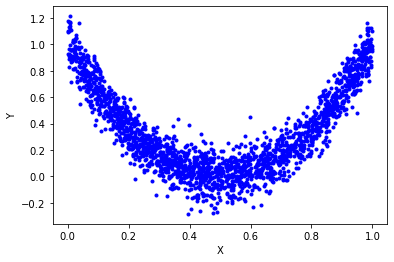

In [14]:
import matplotlib.pyplot as plt
plt.plot(X,Y, 'b.')
plt.ylabel('Y')
plt.xlabel('X')

In [15]:
Y_train.shape

(1600, 1)

In [16]:
Y_train.ravel()

array([ 0.04031722,  0.12551785,  0.51849997, ..., -0.0301615 ,
        0.56852906,  0.08446947])

In [17]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(max_depth=2, random_state=1, n_estimators=20)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(X_train, Y_train.ravel()) 

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=1)

In [18]:
from sklearn.metrics import mean_squared_error
print('the training mean squared error is: ', mean_squared_error(rf_reg.predict(X_train), Y_train))
print('the testing mean squared error is: ', mean_squared_error(rf_reg.predict(X_test), Y_test))

the training mean squared error is:  0.0214951917758256
the testing mean squared error is:  0.02212524660537352


#### 2.2 K-folds Cross Validation

In [19]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf_reg, X, Y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-0.02055619 -0.02338512 -0.02123739 -0.02096031 -0.02156201]
test_score:  [-0.01916226 -0.02415364 -0.0210835  -0.02363969 -0.02355731]


In [20]:
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

cross val training mean_squared_error is: 0.0215402023535854
cross val testing mean_squared_error is: 0.022319280542776355


#### 2.3 Tuning Parameters

Instead of tuning multiple parameters using grid search, this time we will be only tuning one parameter (i.e. max_depth). Through this process, you will be having a better understanding on model underfitting and overfitting (bias and variance). 

In [21]:
# Setting max_depth from 2 to 9 (8 different values)
# Training & evaluating the model 8 times with different max_depth value
# Store both simple split measures (train_mse & test_mse) and 
# cross validation measures (cross_val_train_mse & cross val_test_mse) into arrays

depth_range = range(2,10)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    # Create Random Forest Model
    rf_reg = RandomForestRegressor(max_depth=d,random_state=1, n_estimators=20)
    rf_reg.fit(X_train, Y_train.ravel()) 
    train_mse.append(mean_squared_error(rf_reg.predict(X_train), Y_train))
    test_mse.append(mean_squared_error(rf_reg.predict(X_test), Y_test))
    
    results  = cross_validate(rf_reg, X, Y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))
    

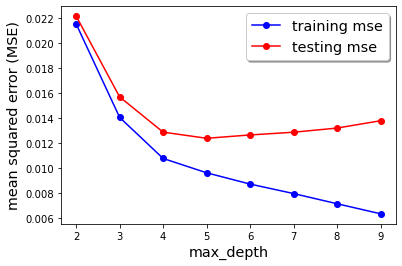

In [22]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

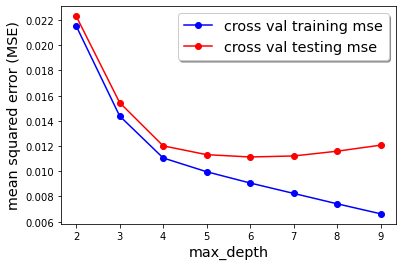

In [23]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

From the above figures, we can see that:
* Initially model is underfitting, so after increase `max_depth` from 2 to 5, both training & testing mse are decreasing;
* Then, after further increase `max_depth` to 6, 7, 8 and 9, though training mse is still decreasing, testing mse starts to increase, i.e. model is overfitting. 

Therefore, we think the ideal `max_depth` is around 5. Now let's build our final model using `max_depth =5`.

In [24]:
print('***Final Model***')
rf_reg_final = RandomForestRegressor(max_depth=5,random_state=1, n_estimators=20)
rf_reg_final.fit(X_train, Y_train.ravel()) 
print('training mse: ', mean_squared_error(rf_reg_final.predict(X_train), Y_train))
print('testing mse: ', mean_squared_error(rf_reg_final.predict(X_test), Y_test))
    
results  = cross_validate(rf_reg_final, X, Y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))


***Final Model***
training mse:  0.009582995911544961
testing mse:  0.012344919969897864
cross val training mse: 0.009959313771995533
cross val testing mse: 0.011315745713622196


### 3. Exercise <a id='exc' />

Using SVM (Support Vector Machine) Model to solve the above classification problem and regression problem. 

#### 3.1 Classification Problem

In [25]:
# Task 1: Load Data and Split into train & test data
df = pd.read_csv('titanic_new.csv')
df_x = df.iloc[:,1:]
df_y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state = 4)

In [26]:
# Task 2: Build Model and Evaluate both training and testing accuracy

#Import the package
from sklearn import svm

svc_model = svm.SVC(kernel='linear', gamma = 0.001, C = 0.1)
svc_model.fit(X_train,y_train)

print('The training accuracy is: ', svc_model.score(X_train,y_train))
print('The testing accuracy is: ', svc_model.score(X_test,y_test))

The training accuracy is:  0.7851123595505618
The testing accuracy is:  0.8156424581005587


In [37]:
# Task 3: Evaluate the Model using K-folds Cross validation
#svc_model_results = cross_validate(svc_model, X, Y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
results  = cross_validate(svc_model, df_x, df_y.ravel(), scoring='accuracy', cv=5, return_train_score = True)

print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

print('cross val training accuracy is: ', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is: ', sum(-results['test_score'])/len(results['test_score']))

train_score:  [0.78651685 0.78681627 0.79242637 0.80084151 0.78962132]
test_score:  [0.81005587 0.80337079 0.78651685 0.75280899 0.79775281]
cross val training accuracy is:  -0.7912444647556612
cross val testing accuracy is:  -0.7901010608248069


In [28]:
# Task 4 (optional): tuning parametars or using Grid Search to find the best parameters.

#### 3.2 Regression Problem

In [38]:
# Task 1: Generate the data: Quadratic data set + noise
np.random.seed(3)
m = 2000
X = np.random.rand(m, 1)
Y = 4 * (X - 0.5) ** 2
Y = Y + np.random.randn(m,1)/10

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
# Task 2: Build Model and Evaluate both training and testing MSE
svregressor_model = svm.SVR(kernel='linear', gamma = 0.001, C = 0.1)
svregressor_model.fit(X_train,y_train.ravel())

print("The training mean_squared_error is: ", mean_squared_error(svregressor_model.predict(X_train), y_train))
print("The testing mean_squared_error is: ", mean_squared_error(svregressor_model.predict(X_test), y_test))

The training mean_squared_error is:  0.09856568410136514
The testing mean_squared_error is:  0.1006710779492365


In [43]:
# Task 3: Evaluate the Model using K-folds Cross validation
svregressor_model_results = cross_validate(svregressor_model, X, Y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

print('cross validating training mean_squared_error is: ', sum(-results['train_score'])/len(results['train_score']))
print('cross validating testing mean_squared_error is: ', sum(-results['test_score'])/len(results['test_score']))

train_score:  [0.78651685 0.78681627 0.79242637 0.80084151 0.78962132]
test_score:  [0.81005587 0.80337079 0.78651685 0.75280899 0.79775281]
cross validating training mean_squared_error is:  -0.7912444647556612
cross validating testing mean_squared_error is:  -0.7901010608248069


In [32]:
# Task 4 (optional): tuning parametars or using Grid Search to find the best parameters.